In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets
import ph_modules as pm
import statsmodels.api as sm
from IPython.display import display


def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_before_ph = pd.read_csv(config['ph'])

df_after_ph = pd.read_csv(config['ph2'])



In [2]:
# Drop NaN values from both DataFrames
df_before_ph_cleaned = df_before_ph.dropna()
df_after_ph_cleaned = df_after_ph.dropna()

# Sort both cleaned DataFrames by 'Weeks'
df_before_ph_sorted = df_before_ph_cleaned.sort_values(by='Weeks')
df_after_ph_sorted = df_after_ph_cleaned.sort_values(by='Weeks')

# Extract 'Weeks' for plotting
weeks_before = df_before_ph_sorted['Weeks']
weeks_after = df_after_ph_sorted['Weeks']

# List of participants, excluding the 'Weeks' column
participants = df_before_ph_sorted.columns[1:].tolist()

# Define the plotting function
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    # Plotting 'Before' data
    if participant in df_before_ph_sorted.columns:
        axes[0].plot(weeks_before, df_before_ph_sorted[participant], marker='o', label='Before', color='blue')
        axes[0].set_title(f'{participant} - Before')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('pH Values')
        axes[0].legend()
        
    # Plotting 'After' data
    if participant in df_after_ph_sorted.columns:
        axes[1].plot(weeks_after, df_after_ph_sorted[participant], marker='o', label='After', color='green')
        axes[1].set_title(f'{participant} - After')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create and display a Dropdown widget for selecting participants
participant_selector = widgets.Dropdown(options=participants, value=participants[0], description='Participant:')
widgets.interactive(plot_data, participant=participant_selector)


interactive(children=(Dropdown(description='Participant:', options=('participant 1', 'participant 2', 'partici…

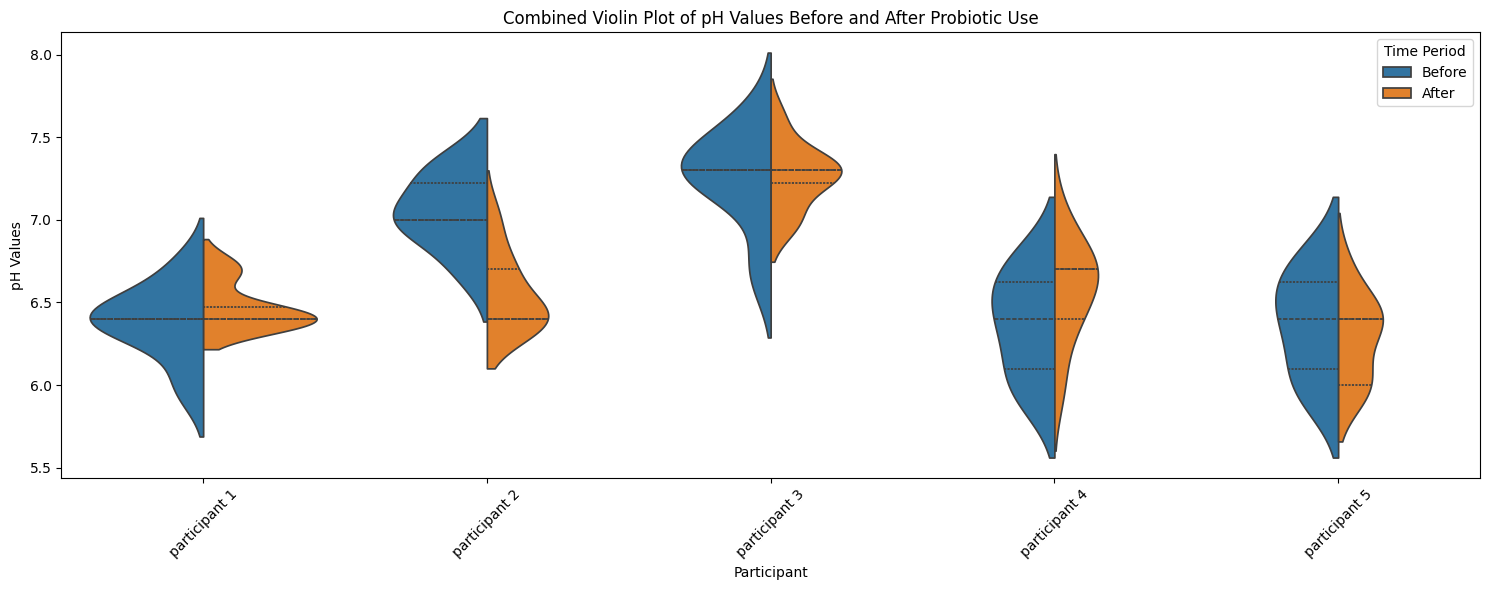

In [3]:
def plot_combined_violin():
    # Prepare 'before' data
    df_before_melted = df_before_ph_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='pH_Values')
    df_before_melted['Time'] = 'Before'

    # Prepare 'after' data
    df_after_melted = df_after_ph_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='pH_Values')
    df_after_melted['Time'] = 'After'

    # Combine data
    df_combined = pd.concat([df_before_melted, df_after_melted])

    # Create violin plot
    plt.figure(figsize=(15, 6))
    sns.violinplot(x='Participant', y='pH_Values', hue='Time', data=df_combined, split=True, inner='quart')
    plt.title('Combined Violin Plot of pH Values Before and After Probiotic Use')
    plt.ylabel('pH Values')
    plt.xlabel('Participant')
    plt.legend(title='Time Period')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to display the plot
plot_combined_violin()

In [4]:
def interactive_ds_qq_plot(participant):
    """
    This function uses the custom DS_Q_Q_Plot function from the ph_modules
    for the selected participant's pH values before and after probiotic use.
    """
    participant_str = str(participant)  # Convert to string if not already
    
    # Extracting data for the selected participant
    data_before = df_before_ph_sorted[participant_str].dropna()
    data_after = df_after_ph_sorted[participant_str].dropna()
    
    # Displaying custom Q-Q Plots for before and after data
    print(f"Q-Q Plot for {participant_str} - Before Probiotic Use:")
    pm.DS_Q_Q_Plot(data_before, est='robust')
    
    print(f"Q-Q Plot for {participant_str} - After Probiotic Use:")
    pm.DS_Q_Q_Plot(data_after, est='robust')

# Create a Dropdown widget for selecting participants
participant_dropdown = widgets.Dropdown(
    options=participants,  # Assuming 'participants' list is already defined
    value=participants[0],
    description='Participant:',
)

# Setup interactive widget
widgets.interactive(interactive_ds_qq_plot, participant=participant_dropdown)


interactive(children=(Dropdown(description='Participant:', options=('participant 1', 'participant 2', 'partici…

In [6]:
def interactive_anderson_darling_visualization(participant):
    """
    This function applies the Anderson-Darling normality test to the selected 
    participant's pH values before and after probiotic use, and visualizes the results.
    """
    participant_str = str(participant)
    
    # Extract data for the selected participant
    data_before = df_before_ph_sorted[participant_str].dropna()
    data_after = df_after_ph_sorted[participant_str].dropna()
    
    # Run the Anderson-Darling test for 'before' and 'after' data
    result_before = pm.DS_AndersonDarling_test_normal(data_before)
    result_after = pm.DS_AndersonDarling_test_normal(data_after)
    
    # Visualization of the results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Assuming the function returns a tuple where the first value is the statistic and the second is the p-value
    axes[0].bar(['Statistic', 'P-Value'], [result_before[0], result_before[1]], color='blue')
    axes[0].set_title(f'{participant_str} - Before Probiotic Use')
    axes[0].set_ylim([0, max(result_before[0], result_before[1], 1)])
    
    axes[1].bar(['Statistic', 'P-Value'], [result_after[0], result_after[1]], color='green')
    axes[1].set_title(f'{participant_str} - After Probiotic Use')
    axes[1].set_ylim([0, max(result_after[0], result_after[1], 1)])
    
    for ax in axes:
        ax.set_ylabel('Test Results')
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                        textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Create and display a Dropdown widget for selecting participants
participant_dropdown = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Setup interactive widget
widgets.interactive(interactive_anderson_darling_visualization, participant=participant_dropdown)


interactive(children=(Dropdown(description='Participant:', options=('participant 1', 'participant 2', 'partici…

In [7]:
def interactive_mann_whitney_test_and_visualize(participant):
    """
    Applies the DS_2sample_MannWhitney_test_medians function from ph_modules
    to compare the pH values for the selected participant before and after probiotic use,
    and visualizes the comparison.
    """
    participant_str = str(participant)
    
    # Extracting data for the selected participant
    data_before = df_before_ph_sorted[participant_str].dropna()
    data_after = df_after_ph_sorted[participant_str].dropna()
    
    # Running the Mann-Whitney U test
    test_result = pm.DS_2sample_MannWhitney_test_medians(data_before, data_after)
    u_statistic, p_value, *rest = test_result
    
    # Print the test result
    print(f"Mann-Whitney U Test for {participant_str} - Comparing Before and After Probiotic Use:")
    print(f"U Statistic: {u_statistic}, P-value: {p_value}")
    
    # Visualization
    fig, ax = plt.subplots(figsize=(6, 4))
    medians = [data_before.median(), data_after.median()]
    ax.bar(['Before', 'After'], medians, color=['blue', 'green'])
    ax.set_title(f'Median pH Values for {participant_str} Before and After Probiotic Use')
    ax.set_ylabel('Median pH Value')
    for i, median in enumerate(medians):
        ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Create and display a Dropdown widget for selecting participants
participant_dropdown = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Setup interactive widget
widgets.interactive(interactive_mann_whitney_test_and_visualize, participant=participant_dropdown)


interactive(children=(Dropdown(description='Participant:', options=('participant 1', 'participant 2', 'partici…